# Project 1: Digit Classification with KNN and Naive Bayes

In this project, you'll implement your own image recognition system for classifying digits. Read through the code and the instructions carefully and add your own code where indicated. Each problem can be addressed succinctly with the included packages -- please don't add any more. Grading will be based on writing clean, commented code, along with a few short answers.

As always, you're welcome to work on the project in groups and discuss ideas on the course wall, but <b> please prepare your own write-up (with your own code). </b>

If you're interested, check out these links related to digit recognition:

* Yann Lecun's MNIST benchmarks: http://yann.lecun.com/exdb/mnist/
* Stanford Streetview research and data: http://ufldl.stanford.edu/housenumbers/

Finally, if you'd like to get started with Tensorflow, you can read through this tutorial: https://www.tensorflow.org/tutorials/keras/basic_classification. It uses a dataset called "fashion_mnist", which is identical in structure to the original digit mnist, but uses images of clothing rather than images of digits. The number of training examples and number of labels is the same. In fact, you can simply replace the code that loads "fashion_mnist" with "mnist" and everything should work fine.

In [3]:
# This tells matplotlib not to try opening a new window for each plot.
%matplotlib inline

# Import a bunch of libraries.
import time
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator
from sklearn.pipeline import Pipeline
from sklearn.datasets import fetch_openml
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LinearRegression
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

# Set the randomizer seed so results are the same each time.
np.random.seed(0)

In [4]:
import sklearn
sklearn.__version__

'0.20.0'

Load the data. Notice that the data gets partitioned into training, development, and test sets. Also, a small subset of the training data called mini_train_data and mini_train_labels gets defined, which you should use in all the experiments below, unless otherwise noted.

In [5]:
# Load the digit data from https://www.openml.org/d/554 or from default local location '~/scikit_learn_data/...'
X, Y = fetch_openml(name='mnist_784', return_X_y=True, cache=False)
print("here")


# Rescale grayscale values to [0,1].
X = X / 255.0

# Shuffle the input: create a random permutation of the integers between 0 and the number of data points and apply this
# permutation to X and Y.
# NOTE: Each time you run this cell, you'll re-shuffle the data, resulting in a different ordering.
shuffle = np.random.permutation(np.arange(X.shape[0]))
X, Y = X[shuffle], Y[shuffle]

print('data shape: ', X.shape)
print('label shape:', Y.shape)

# Set some variables to hold test, dev, and training data.
test_data, test_labels = X[61000:], Y[61000:]
dev_data, dev_labels = X[60000:61000], Y[60000:61000]
train_data, train_labels = X[:60000], Y[:60000]
mini_train_data, mini_train_labels = X[:1000], Y[:1000]

here
data shape:  (70000, 784)
label shape: (70000,)


In [6]:
print(test_data.shape)

(9000, 784)


### Part 1:

Show a 10x10 grid that visualizes 10 examples of each digit.

Notes:
* You can use `plt.rc()` for setting the colormap, for example to black and white.
* You can use `plt.subplot()` for creating subplots.
* You can use `plt.imshow()` for rendering a matrix.
* You can use `np.array.reshape()` for reshaping a 1D feature vector into a 2D matrix (for rendering).

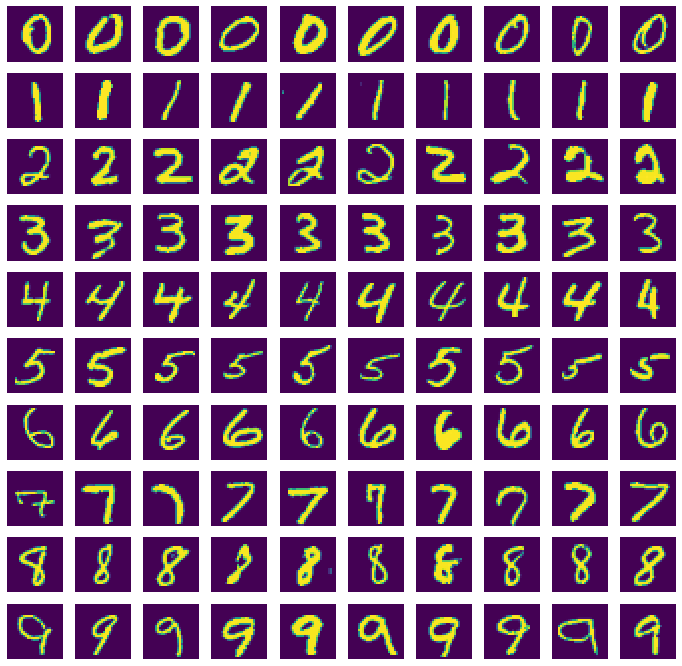

In [7]:
def P1(num_examples=10):
    
    figure = plt.figure(figsize=(12, 12))
    
#     Set counts to 0, and fill array with the numbers we want to show
    counts = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
    numbers = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
    
#     Loop over each count, and check that it is under 10. If so, plot it.
    for i in range(len(counts)):
        for j in range(0, len(X)):      
            if (Y[j] == str(numbers[i]) and counts[i] < 10):
                counts[i] = counts[i] + 1
#                 Here, place it on the correct index by looking and the count as well as the numbers
                final_image = figure.add_subplot(10, 10, numbers[i] * 10 + counts[i])
#                 Can add cmap = 'gray' here, but I feel like the colored images look cooler
                final_image.imshow(np.array(X[j]).reshape(28,28))
                final_image.set_axis_off()

P1(10)

### Part 2:

Produce k-Nearest Neighbors models with k $\in$ [1,3,5,7,9].  Evaluate and show the accuracy of each model. For the 1-Nearest Neighbor model, additionally show the precision, recall, and F1 for each label. Which digit is the most difficult for the 1-Nearest Neighbor model to recognize?

Notes:
* Train on the mini train set.
* Evaluate performance on the dev set.
* You can use `KNeighborsClassifier` to produce a k-nearest neighbor model.
* You can use `classification_report` to get precision, recall, and F1 results.

In [8]:
def P2(k):
#     Fit the model, and get an accuracy score
    KNN_model = KNeighborsClassifier(k)
    KNN_model.fit(mini_train_data, mini_train_labels)
    accuracy = KNN_model.score(dev_data, dev_labels)    
    
#     print confusion matrix
    if k==1:
        print("Classification Report for K=1")
        print(classification_report(dev_labels, KNN_model.predict(dev_data)))
        
    print("Accuracy for " + str(k) + " neighbor(s) is: " + str(accuracy*100) + "%")
    
P2(1)
P2(3)
P2(5)
P2(7)
P2(9)
    


Classification Report for K=1
              precision    recall  f1-score   support

           0       0.95      0.95      0.95       106
           1       0.89      0.98      0.93       118
           2       0.90      0.79      0.84       106
           3       0.93      0.87      0.90        97
           4       0.91      0.85      0.88        92
           5       0.86      0.88      0.87        88
           6       0.92      0.92      0.92       102
           7       0.85      0.94      0.89       102
           8       0.83      0.77      0.80        94
           9       0.80      0.86      0.83        95

   micro avg       0.88      0.88      0.88      1000
   macro avg       0.88      0.88      0.88      1000
weighted avg       0.89      0.88      0.88      1000

Accuracy for 1 neighbor(s) is: 88.4%
Accuracy for 3 neighbor(s) is: 87.6%
Accuracy for 5 neighbor(s) is: 88.2%
Accuracy for 7 neighbor(s) is: 87.7%
Accuracy for 9 neighbor(s) is: 87.5%


ANSWER: **I see that 8 is the most difficult digit to recognize, taking from the F1 score**

### Part 3:

Produce 1-Nearest Neighbor models using training data of various sizes.  Evaluate and show the performance of each model.  Additionally, show the time needed to measure the performance of each model.

Notes:
* Train on subsets of the train set.  For each subset, take just the first part of the train set without re-ordering.
* Evaluate on the dev set.
* You can use `KNeighborsClassifier` to produce a k-nearest neighbor model.
* You can use `time.time()` to measure elapsed time of operations.

In [9]:
# Given train sizes
train_sizes = [100, 200, 400, 800, 1600, 3200, 6400, 12800, 25600]
accuracies = []


def P3(train_sizes, accuracies):
    start = time.time()
#     Segment the data into smaller chunks for training
    for i in range(len(train_sizes)):
        KNN_model = KNeighborsClassifier(1)
        segmented_train_data, segmented_train_labels = train_data[:train_sizes[i]], train_labels[:train_sizes[i]]
        KNN_model.fit(segmented_train_data, segmented_train_labels)
#         Once again, get accuracy
        accuracy = KNN_model.score(dev_data, dev_labels)
        accuracies.append(accuracy)
        
        print("For a training size of " + str(train_sizes[i]) + ", accuracy is " + str(round(accuracy * 100, 2)) + "%. It took " + str(round(time.time() - start, 1)) + " seconds.")  
    
    return accuracies

P3(train_sizes, accuracies)



For a training size of 100, accuracy is 70.2%. It took 0.2 seconds.
For a training size of 200, accuracy is 79.1%. It took 0.4 seconds.
For a training size of 400, accuracy is 81.1%. It took 0.9 seconds.
For a training size of 800, accuracy is 86.6%. It took 1.7 seconds.
For a training size of 1600, accuracy is 90.5%. It took 3.5 seconds.
For a training size of 3200, accuracy is 92.7%. It took 7.3 seconds.
For a training size of 6400, accuracy is 93.9%. It took 15.5 seconds.
For a training size of 12800, accuracy is 95.2%. It took 31.9 seconds.
For a training size of 25600, accuracy is 96.3%. It took 67.2 seconds.


[0.702, 0.791, 0.811, 0.866, 0.905, 0.927, 0.939, 0.952, 0.963]

### Part 4:

Produce a linear regression model that predicts accuracy of a 1-Nearest Neighbor model given training set size. Show $R^2$ of the linear regression model.  Show the accuracies predicted for training set sizes 60000, 120000, and 1000000.  Show a lineplot of actual accuracies and predicted accuracies vs. training set size over the range of training set sizes in the training data.  What's wrong with using linear regression here?

Apply a transformation to the predictor features and a transformation to the outcome that make the predictions more reasonable.  Show $R^2$ of the improved linear regression model.  Show the accuracies predicted for training set sizes 60000, 120000, and 1000000.  Show a lineplot of actual accuracies and predicted accuracies vs. training set size over the range of training set sizes in the training data - be sure to display accuracies and training set sizes in appropriate units.

Notes:
* Train the linear regression models on all of the (transformed) accuracies estimated in Problem 3.
* Evaluate the linear regression models on all of the (transformed) accuracies estimated in Problem 3.
* You can use `LinearRegression` to produce a linear regression model.
* Remember that the sklearn `fit()` functions take an input matrix X and output vector Y. So, each input example in X is a vector, even if it contains only a single value.
* Hint re: predictor feature transform: Accuracy increases with training set size logarithmically.
* Hint re: outcome transform: When y is a number in range 0 to 1, then odds(y)=y/(1-y) is a number in range 0 to infinity.

For a training size of 100, accuracy is 70.2%. It took 0.1 seconds.
For a training size of 200, accuracy is 79.1%. It took 0.4 seconds.
For a training size of 400, accuracy is 81.1%. It took 0.8 seconds.
For a training size of 800, accuracy is 86.6%. It took 1.6 seconds.
For a training size of 1600, accuracy is 90.5%. It took 3.4 seconds.
For a training size of 3200, accuracy is 92.7%. It took 6.9 seconds.
For a training size of 6400, accuracy is 93.9%. It took 14.0 seconds.
For a training size of 12800, accuracy is 95.2%. It took 30.7 seconds.
For a training size of 25600, accuracy is 96.3%. It took 66.0 seconds.
----------------------------------------------------
The r^2 of linear regression model is 0.4177006634161019
The r^2 of improved regression model is 0.9068304252436641


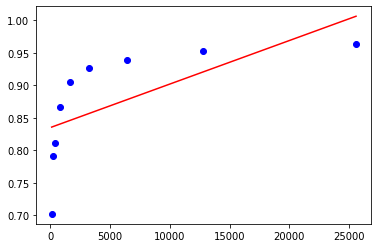

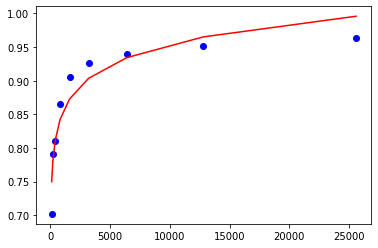

In [10]:
from sklearn.metrics import r2_score

def P4():
    train_sizes = np.array([100, 200, 400, 800, 1600, 3200, 6400, 12800, 25600])
    accuracies = P3(train_sizes, [])
    lin_mod = LinearRegression().fit(train_sizes.reshape(-1, 1), accuracies)
    
#     Sizes to predict
    predict_sizes = np.array([100, 200, 400, 800, 1600, 3200, 6400, 12800, 25600, 60000, 120000, 1000000]).reshape(-1, 1)
    predicted = lin_mod.predict(predict_sizes)
    
    plt.figure(1)
    plt.plot(train_sizes, accuracies, "bo", predict_sizes[:9], predicted[:9], "r")
#     plt.plot(predicted)
    
#     R^2 value
    r2lin = r2_score(accuracies, predicted[:9])
    print("----------------------------------------------------")
    print("The r^2 of linear regression model is " + str(r2lin))
    
#     This is how you do log odds, taken from w271
#     npacc = np.array(accuracies)
#     logTransform = np.log(npacc / (1 - npacc))
    log_mod = LinearRegression().fit(np.array(np.log(train_sizes)).reshape(-1, 1), accuracies)
    predicted_log = log_mod.predict(np.log(predict_sizes))
    
    plt.figure(2)
    plt.plot(train_sizes, accuracies, "bo", predict_sizes[:9], predicted_log[:9], "r")
    
#     R^2 value
    r2log = r2_score(accuracies, predicted_log[:9])
    print("The r^2 of improved regression model is " + str(r2log))


P4()

ANSWER: **It is clear to see that the log transformed values, and thus line, fit a lot better to data rather than the linear ones. Also note the R^2 of the linear model is about 0.4, but it jumps to 0.9 with the log transformation. Thus, it is a far better estimate.**

### Part 5:

Produce a 1-Nearest Neighbor model and show the confusion matrix. Which pair of digits does the model confuse most often? Show the images of these most often confused digits.

Notes:
- Train on the mini train set.
- Evaluate performance on the dev set.
- You can use `confusion_matrix()` to produce a confusion matrix.

Accuracy is 88.4%
     t/p      0     1     2     3     4     5     6     7     8     9 
        0 101.0   0.0   1.0   0.0   0.0   0.0   1.0   1.0   2.0   0.0 
        1   0.0 116.0   1.0   0.0   0.0   0.0   0.0   0.0   1.0   0.0 
        2   1.0   4.0  84.0   2.0   2.0   0.0   2.0   4.0   6.0   1.0 
        3   0.0   2.0   0.0  84.0   0.0   6.0   0.0   2.0   3.0   0.0 
        4   0.0   0.0   1.0   0.0  78.0   0.0   0.0   2.0   0.0  11.0 
        5   2.0   0.0   0.0   1.0   1.0  77.0   5.0   0.0   2.0   0.0 
        6   1.0   2.0   1.0   0.0   1.0   2.0  94.0   0.0   1.0   0.0 
        7   0.0   1.0   1.0   0.0   0.0   0.0   0.0  96.0   0.0   4.0 
        8   1.0   5.0   4.0   3.0   1.0   3.0   0.0   1.0  72.0   4.0 
        9   0.0   1.0   0.0   0.0   3.0   2.0   0.0   7.0   0.0  82.0 
Total Misclassifications 116
Total Misclassified Images for 4 and 9: 14


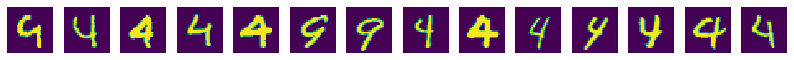

In [12]:
# Taken from https://gist.github.com/zachguo/10296432 - allows for nice display of the confusion_matrix. Doube checked off github
def print_cm(cm, labels, hide_zeroes=False, hide_diagonal=False, hide_threshold=None):
    """pretty print for confusion matrixes"""
    columnwidth = max([len(x) for x in labels] + [5])  # 5 is value length
    empty_cell = " " * columnwidth
    
    # Begin CHANGES
    fst_empty_cell = (columnwidth-3)//2 * " " + "t/p" + (columnwidth-3)//2 * " "
    
    if len(fst_empty_cell) < len(empty_cell):
        fst_empty_cell = " " * (len(empty_cell) - len(fst_empty_cell)) + fst_empty_cell
    # Print header
    print("    " + fst_empty_cell, end=" ")
    # End CHANGES
    
    for label in labels:
        print("%{0}s".format(columnwidth) % label, end=" ")
        
    print()
    # Print rows
    for i, label1 in enumerate(labels):
        print("    %{0}s".format(columnwidth) % label1, end=" ")
        for j in range(len(labels)):
            cell = "%{0}.1f".format(columnwidth) % cm[i, j]
            if hide_zeroes:
                cell = cell if float(cm[i, j]) != 0 else empty_cell
            if hide_diagonal:
                cell = cell if i != j else empty_cell
            if hide_threshold:
                cell = cell if cm[i, j] > hide_threshold else empty_cell
            print(cell, end=" ")
        print()
        
        
### STUDENT START ###
def P5():
#     Get all the labels
    labels = sorted(set(mini_train_labels))
    KNN_model = KNeighborsClassifier(1)
#     Fit and predict model
    KNN_model.fit(mini_train_data, mini_train_labels)
    predictions = KNN_model.predict(dev_data)   
#     create confusion matrix, it goes y true, y predicted, then lavels
    cm = confusion_matrix(dev_labels, predictions, labels = labels)
#     print(cm)
    print("Accuracy is " + str(KNN_model.score(dev_data, dev_labels)*100) + "%")
    print_cm(cm, ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9'])

#     The most confused values are 4s and 9s, as we can see from the matrix 

    dimensions = 28
    figure = plt.figure(figsize=(14, 14))
    misclassified = []
    
    
#     Figure out which numbers were misclassified between 4s and 9s
    for i in range(len(dev_labels)):
        if(predictions[i] != dev_labels[i]):
            if(predictions[i] == '4' and dev_labels[i] == '9'):
                misclassified.append(dev_data[i])
            if(predictions[i] == '9' and dev_labels[i] == '4'):
                misclassified.append(dev_data[i])

#     This is 14 because there are 14 misclassified entries. There are 116 total Misclassifications     
    print("Total Misclassifications " + str(sum(predictions != dev_labels)))
    print("Total Misclassified Images for 4 and 9: " + str(len(misclassified)))
        
#      Print out only the images that were misclassified   
    for item in range(len(misclassified)):
        final_image = figure.add_subplot(14, 14, item+1)
        final_image.imshow(np.array(misclassified[item]).reshape(dimensions,dimensions))
        final_image.set_axis_off()

    
    
P5()


ANSWER: **The first 3 enteries were mislabeled as 4 when they were actually 9, and the last 11 were labeled as 9 when they were actually 4.**

### Part 6:

A common image processing technique is to smooth an image by blurring. The idea is that the value of a particular pixel is estimated as the weighted combination of the original value and the values around it. Typically, the blurring is Gaussian, i.e., the weight of a pixel's influence is determined by a Gaussian function over the distance to the relevant pixel.

Implement a simplified Gaussian blur filter by just using the 8 neighboring pixels like this: the smoothed value of a pixel is a weighted combination of the original value and the 8 neighboring values.

Pick a weight, then produce and evaluate four 1-Nearest Neighbor models by applying your blur filter in these ways:
- Do not use the filter
- Filter the training data but not the dev data
- Filter the dev data but not the training data
- Filter both training data and dev data

Show the accuracies of the four models evaluated as described.  Try to pick a weight that makes one model's accuracy at least 0.9.

Notes:
* Train on the (filtered) mini train set.
* Evaluate performance on the (filtered) dev set.
* There are other Guassian blur filters available, for example in `scipy.ndimage.filters`. You are welcome to experiment with those, but you are likely to get the best results with the simplified version described above.

In [47]:
from scipy.ndimage import gaussian_laplace, gaussian_filter, gaussian_gradient_magnitude

def P6():
#     No filter

    KNN_model = KNeighborsClassifier(1)
    KNN_model.fit(mini_train_data, mini_train_labels)
    accuracy = KNN_model.score(dev_data, dev_labels) 
    print("1: " + str(accuracy*100) + "%") 

    train_blur = gaussian_laplace(mini_train_data, sigma = 0.5, mode = 'nearest', cval = 2, truncate = 2)
    dev_blur = gaussian_laplace(dev_data, sigma = 0.5, mode = 'nearest', cval = 2, truncate = 2)

    KNN_model2 = KNeighborsClassifier(1)
    KNN_model2.fit(train_blur, mini_train_labels)
    accuracy2 = KNN_model2.score(dev_data, dev_labels) 
    print("2: " + str(accuracy2*100) + "%")

    KNN_model3 = KNeighborsClassifier(1)
    KNN_model3.fit(mini_train_data, mini_train_labels)
    accuracy3 = KNN_model3.score(dev_blur, dev_labels) 
    print("3: " + str(accuracy3*100) + "%")

    KNN_model4 = KNeighborsClassifier(1)
    KNN_model4.fit(train_blur, mini_train_labels)
    accuracy4 = KNN_model4.score(dev_blur, dev_labels) 
    print("4: " + str(accuracy4*100) + "%")

P6()

1: 88.4%
2: 11.799999999999999%
3: 3.5000000000000004%
4: 79.80000000000001%


### Part 7:

Produce two Naive Bayes models and evaluate their performances.  Recall that Naive Bayes estimates P(feature|label), where each label is a categorical, not a real number.

For the first model, map pixel values to either 0 or 1, representing white or black - you should pre-process the data or use `BernoulliNB`'s `binarize` parameter to set the white/black separation threshold to 0.1.  Use `BernoulliNB` to produce the model.

For the second model, map pixel values to either 0, 1, or 2, representing white, gray, or black - you should pre-process the data, seting the white/gray/black separation thresholds to 0.1 and 0.9.  Use `MultinomialNB` to produce the model. 

Show the Bernoulli model accuracy and the Multinomial model accuracy.

Notes:
* Train on the mini train set.
* Evaluate performance on the dev set.
* `sklearn`'s Naive Bayes methods can handle real numbers, but for this exercise explicitly do the mapping to categoricals. 

Does the multinomial version improve the results? Why or why not?

In [48]:
def P7():
    
    BernoulliNB.model = BernoulliNB(alpha=1, binarize=0.1)
    BernoulliNB.model.fit(mini_train_data, mini_train_labels)
    accuracy = BernoulliNB.model.score(dev_data, dev_labels)
    print("The accuracy of Bernoulli is: " + str(accuracy*100) + "%")

#     1 if its above 0.1, 2 if its above 0.9 for train
    train_zeros = np.zeros(mini_train_data.shape)
    train_zeros[mini_train_data < 0.1] = 0
    train_zeros[mini_train_data > 0.1] = 1
    train_zeros[mini_train_data > 0.9] = 2
    MultinomialNB_train = train_zeros

#     1 if its above 0.1, 2 if its above 0.9 for dev
    dev_zeros = np.zeros(dev_data.shape)
    dev_zeros[dev_data < 0.1] = 0
    dev_zeros[dev_data > 0.1] = 1
    dev_zeros[dev_data > 0.9] = 2
    MultinomialNB_dev = dev_zeros


    # Fit model
    MultinomialNB.model = MultinomialNB(alpha=1)
    MultinomialNB.model.fit(MultinomialNB_train, mini_train_labels)  
    accuracy = MultinomialNB.model.score(MultinomialNB_dev, dev_labels)
    print("The accuracy of MultinomialNB is: " + str(accuracy*100) + "%")

P7()

The accuracy of Bernoulli is: 81.39999999999999%
The accuracy of MultinomialNB is: 80.7%


ANSWER: **The Multinomial NB does not improve results, likely because of the arbitary thresholds for 0, 1, 2. In reality, we do not know what constitues white/gray/black.**

### Part 8:

Search across several values of the LaPlace smoothing parameter (alpha) to find its effect on a Bernoulli Naive Bayes model's performance.  Show the accuracy at each alpha value.

Notes:
* Set binarization threshold to 0.
* Train on the mini train set.
* Evaluate performance by 5-fold cross-validation. 
* Use `GridSearchCV(..., ..., cv=..., scoring='accuracy', iid=False)` to vary alpha and evaluate performance by cross-validation.
* Cross-validation is based on partitions of the training data, so results will be a bit different than if you had used the dev set to evaluate performance.

What is the best value for alpha? What is the accuracy when alpha is near 0? Is this what you'd expect?

In [49]:
# Only for printing purpose
def printAccuracy():
     for alp in alphas.get("alpha"):
        model = BernoulliNB(alpha = alp, binarize=0)
        model.fit(mini_train_data, mini_train_labels)
        score = model.score(dev_data, dev_labels)
        print("For an alpha of "+ str(alp) + ", the accuracy is " + str(score*100) + "%")

def P8(alphas):
    
    printAccuracy()
    binarized_train = BernoulliNB(binarize=0)
#     Use Grid Search to find the best alpha
    grid = GridSearchCV(binarized_train, alphas, cv=5, scoring='accuracy', iid=False)
    grid.fit(mini_train_data, mini_train_labels)
    
    return grid

alphas = {'alpha': [1.0e-10, 0.0001, 0.001, 0.01, 0.1, 0.5, 1.0, 2.0, 10.0]}
nb = P8(alphas)
# Here, we can see the best parameter
print(nb.best_params_)
print(nb.best_score_)

For an alpha of 1e-10, the accuracy is 81.6%
For an alpha of 0.0001, the accuracy is 82.3%
For an alpha of 0.001, the accuracy is 82.3%
For an alpha of 0.01, the accuracy is 82.39999999999999%
For an alpha of 0.1, the accuracy is 82.19999999999999%
For an alpha of 0.5, the accuracy is 81.6%
For an alpha of 1.0, the accuracy is 80.9%
For an alpha of 2.0, the accuracy is 81.10000000000001%
For an alpha of 10.0, the accuracy is 77.9%
{'alpha': 0.001}
0.8248497294059725


ANSWER: **The best value for alpha is alpha of 0.001, which is 82.48%. Near 0, the accuracy is 81.6%. It makes sense this value is lower than some amount of smoothing.**

### Part 9:

Produce a model using Guassian Naive Bayes, which is intended for real-valued features, and evaluate performance. You will notice that it does not work so well. Diagnose the problem and apply a simple fix so that the model accuracy is around the same as for a Bernoulli Naive Bayes model. Show the model accuracy before your fix and the model accuracy after your fix.  Explain your solution.

Notes:
* Train on the mini train set.
* Evaluate performance on the dev set.
* Consider the effects of theta and sigma.  These are stored in the model's `theta_` and `sigma_` attributes.

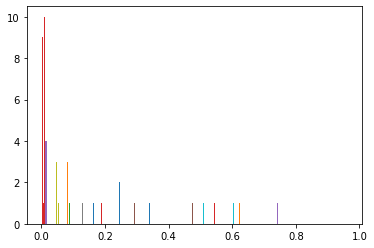

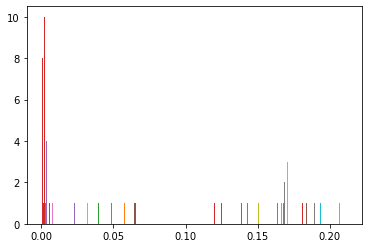

The accuracy of GaussianNB is: 59.3%
The accuracy of the updated GaussianNB is: 80.0%


In [50]:
from sklearn.preprocessing import scale, normalize

# Scale the data, as we have a Gaussian measure here. Mean 0 with variance of 1.
def scaled(data):
    scaled_data = np.empty(data.shape)
    length = len(data)
    for i in range(length):
        scaled_data[i] = scale(data[i]) 
    return scaled_data

def P9():
    
    GaussianNB.model = GaussianNB()
    GaussianNB.model.fit(mini_train_data, mini_train_labels)
    accuracy = GaussianNB.model.score(dev_data, dev_labels)
    
#     See the theta and sigma, and note the skew
    theta = GaussianNB.model.theta_
    plt.hist(theta, bins = 50)
    plt.show()
    
    sigma = GaussianNB.model.sigma_
    plt.hist(sigma, bins = 50)
    plt.show()

    print("The accuracy of GaussianNB is: " + str(accuracy*100) + "%")
    
#     Scale the data, and add some noise that follow mu and sigma
    mu, sigma = 0, 1
    scale_train = scaled(mini_train_data) + np.random.normal(mu, sigma, mini_train_data.shape)
    scale_dev = scaled(dev_data) + np.random.normal(mu, sigma, dev_data.shape)   
    
    GaussianNB.model.update = GaussianNB()
    GaussianNB.model.update.fit(scale_train, mini_train_labels)
    accuracy2 = GaussianNB.model.update.score(scale_dev, dev_labels)
    print("The accuracy of the updated GaussianNB is: " + str(accuracy2*100) + "%")

P9()

ANSWER: **Based on our two graphs, we can see that the theta and sigma are extremely close to 0. We cannot have this, and thus we need to scale the data such that each point has a mean of 0 and SD of 1. Scaling is fantastic for Gaussian processes. Moreover, we can add some norma data with a mu of 0 and sigma of 1. This allows for more of a Gaussian fit. Without this random noise, the accuracy is only around 70%. However, we need to get an accuracy close to about 82%, which is what the Bernoulli Naive Bayes model was at.** 

### Part 10:

Because Naive Bayes produces a generative model, you can use it to generate digit images.

Produce a Bernoulli Naive Bayes model and then use it to generate a 10x20 grid with 20 example images of each digit. Each pixel output should be either 0 or 1, based on comparing some randomly generated number to the estimated probability of the pixel being either 0 or 1.  Show the grid.

Notes:
* You can use np.random.rand() to generate random numbers from a uniform distribution.
* The estimated probability of each pixel being 0 or 1 is stored in the model's `feature_log_prob_` attribute. You can use `np.exp()` to convert a log probability back to a probability.

How do the generated digit images compare to the training digit images?

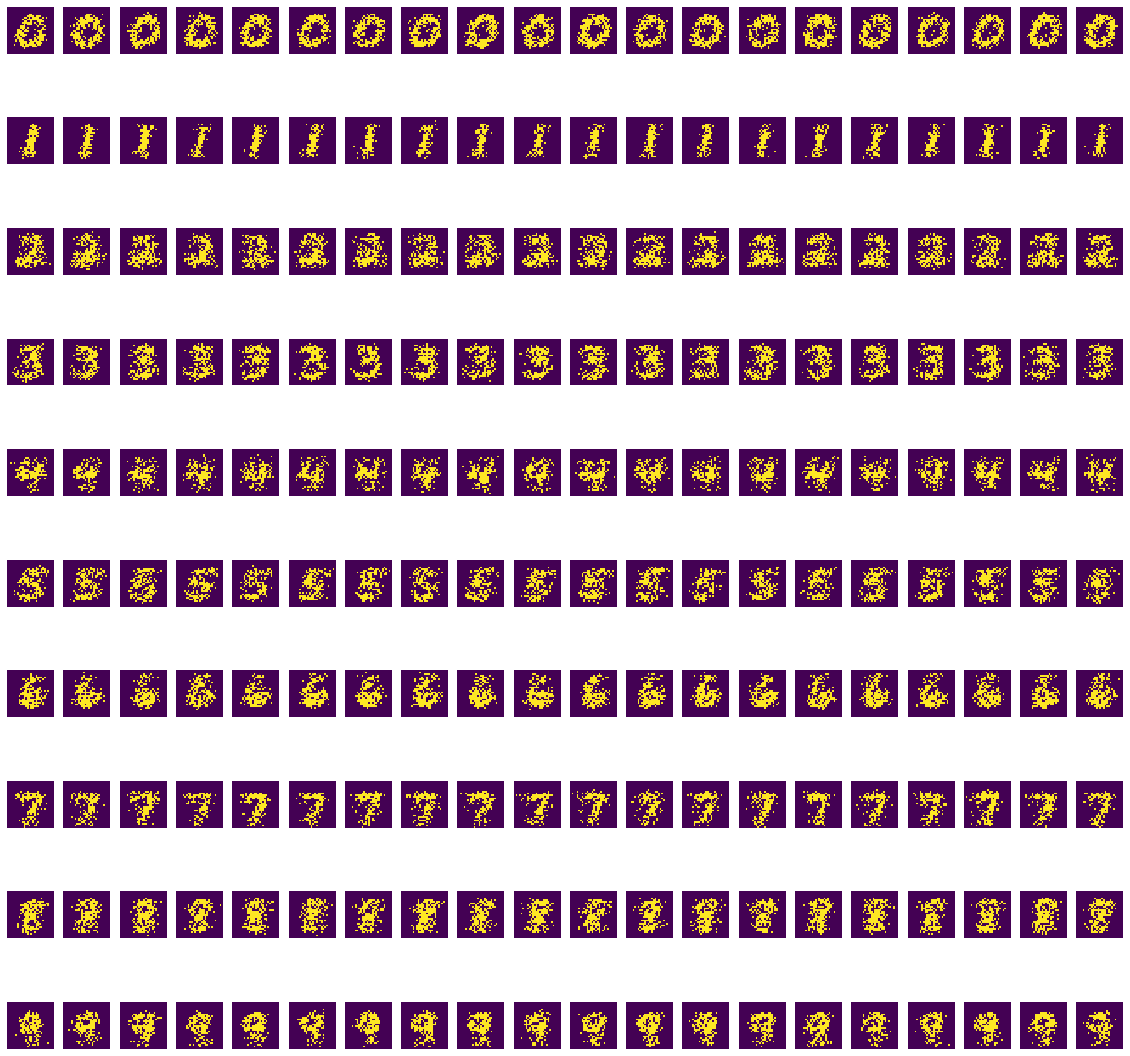

In [51]:
def P10(num_examples):
  

    figure = plt.figure(figsize=(20, 20))
    BernoulliNB.model = BernoulliNB(alpha=0.001, binarize=0.1)
    BernoulliNB.model.fit(mini_train_data, mini_train_labels)
    probability = np.exp(BernoulliNB.model.feature_log_prob_)
    
    #Iterate over each subplot to create the example images
    for i in range(10):
        for j in range(num_examples): 
            final_image = figure.add_subplot(10, 20, i*20 + j + 1)
            final_image.imshow((probability[i] > np.random.rand(784)).reshape(28, 28)) 
            final_image.set_axis_off()
    
    
P10(20)

ANSWER: **The images are a lot more blurry, but are still what they are supposed to look like. The pixels are generally in the right positions.**

### Part 11:

Recall that a strongly calibrated classifier is rougly 90% accurate when the posterior probability of the predicted class is 0.9. A weakly calibrated classifier is more accurate when the posterior probability of the predicted class is 90% than when it is 80%. A poorly calibrated classifier has no positive correlation between posterior probability and accuracy.  

Produce a Bernoulli Naive Bayes model.  Evaluate performance: partition the dev set into several buckets based on the posterior probabilities of the predicted classes - think of a bin in a histogram- and then estimate the accuracy for each bucket. So, for each prediction, find the bucket to which the maximum posterior probability belongs, and update "correct" and "total" counters accordingly.  Show the accuracy for each bucket.

Notes:
* Set LaPlace smoothing (alpha) to the optimal value (from part 8).
* Set binarization threshold to 0.
* Train on the mini train set.
* Evaluate perfromance on the dev set.

How would you characterize the calibration for this Bernoulli Naive Bayes model?

In [52]:
def P11(buckets, correct, total):


    BernoulliNB.model = BernoulliNB(alpha=0.001, binarize=0)
    BernoulliNB.model.fit(mini_train_data, mini_train_labels)
    predsProbs = BernoulliNB.model.predict_proba(dev_data)
   
    

#     Add 0th lower bound, with 0 as its value. This way, you can straddle between two bins
    trail_bucket = [0] + buckets
#     Two values here - 9 for length of buckets, 1000 for predsProbs
    for i in range(9):
        print("Adding to bucket " + str(i+1))
        for j in range(1000):
            maxVal = max(predsProbs[j]) 
#             Make sure you are in the right bucket
            if maxVal <= buckets[i]: 
                if maxVal > trail_bucket[i]:
#                     Update correct values first, then total values
                    if BernoulliNB.model.predict(dev_data)[j] == dev_labels[j]:
                        correct[i] = correct[i] + 1
                    total[i] = total[i] + 1          

buckets = [0.5, 0.9, 0.999, 0.99999, 0.9999999, 0.999999999, 0.99999999999, 0.9999999999999, 1.0]
correct = [0 for i in buckets]
total = [0 for i in buckets]

P11(buckets, correct, total)

for i in range(len(buckets)):
    accuracy = 0.0
    if (total[i] > 0): accuracy = correct[i] / total[i]
    print('p(pred) is %.13f to %.13f    total = %3d    accuracy = %.3f' % (0 if i==0 else buckets[i-1], buckets[i], total[i], accuracy))

Adding to bucket 1
Adding to bucket 2
Adding to bucket 3
Adding to bucket 4
Adding to bucket 5
Adding to bucket 6
Adding to bucket 7
Adding to bucket 8
Adding to bucket 9
p(pred) is 0.0000000000000 to 0.5000000000000    total =   0    accuracy = 0.000
p(pred) is 0.5000000000000 to 0.9000000000000    total =  31    accuracy = 0.355
p(pred) is 0.9000000000000 to 0.9990000000000    total =  67    accuracy = 0.433
p(pred) is 0.9990000000000 to 0.9999900000000    total =  59    accuracy = 0.458
p(pred) is 0.9999900000000 to 0.9999999000000    total =  46    accuracy = 0.652
p(pred) is 0.9999999000000 to 0.9999999990000    total =  62    accuracy = 0.774
p(pred) is 0.9999999990000 to 0.9999999999900    total =  33    accuracy = 0.788
p(pred) is 0.9999999999900 to 0.9999999999999    total =  43    accuracy = 0.791
p(pred) is 0.9999999999999 to 1.0000000000000    total = 659    accuracy = 0.938


ANSWER: **This model is a weak classifier, because it does not fit the mold of the other two classes. There is indeed a correlation between accuracy and posterior probability. At the same time, at a 0.9 posterior probability, we do not see 90% accuracy (in fact, its about 43%).**

### Part 12 EXTRA CREDIT:

Design new features to see if you can produce a Bernoulli Naive Bayes model with better performance.  Show the accuracy of a model based on the original features and the accuracy of the model based on the new features.

Here are a few ideas to get you started:
- Try summing or averaging the pixel values in each row.
- Try summing or averaging the pixel values in each column.
- Try summing or averaging the pixel values in each square block. (pick various block sizes)
- Try counting the number of enclosed regions. (8 usually has 2 enclosed regions, 9 usually has 1, and 7 usually has 0)

Notes:
* Train on the mini train set (enhanced to comprise the new features).
* Evaulate performance on the dev set.
* Ensure that your code is well commented.

In [0]:
#def P12():

### STUDENT START ###


### STUDENT END ###

#P12()